# Cost Matrices

In [1]:
import numpy as np
import seaborn as sns
sns.set()
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
import pickle
from parfor import parfor
import time

## Main Cost Matrix Function

In [211]:
def percentage(num):
    return round(num,4)*100

def cost_matrix(file_name, player1, player2):
    file_loc = "C:/Users/drago/OneDrive - UW/Ratliff Research/tournaments/"
    pvp_df = pickle.load(open( (file_loc + "dataframes/" + file_name + "_pvp_df.pkl"), "rb"))
    with open(file_loc + file_name+".pkl",'rb') as f:
        out = pickle.load(f)
        players = dict()

    for o in out:
        for p in o.keys():
            if p not in players:
                players[p] = len(players)

    n = len(players)
    game_matrix = np.zeros((n,n))

    count = 0
    trncount = 0
    for o in out:
        for p1 in o.keys():
            sorted_keys = sorted(o[p1].keys())
            #print(sorted_keys)
            for p2 in sorted_keys:
                print(p2)
                idx1 = players[p1]
                idx2 = players[p2]
                wins = pvp_df.loc[(pvp_df['Player 1'] == p1) & (pvp_df['Player 2'] == p2), 'Wins'].iloc[0]
                games = pvp_df.loc[(pvp_df['Player 1'] == p1) & (pvp_df['Player 2'] == p2), 'Games'].iloc[0]
                win_prob = wins / games
                game_matrix[idx1][idx2] = win_prob
            count += 1

    sns.color_palette("light:#5A9", as_cmap=True)
    plt.grid(False)
    plt.imshow(game_matrix.transpose(), vmin=0, vmax=1)
    plt.xlabel('Player 1')
    plt.ylabel('Player 2')
    cbr = plt.colorbar()

    cbr.set_label('Player 1 Win Probability',  labelpad=15)
    plt.xticks([0,48])
    plt.yticks([0,48])
    colour = 'k'
    plt.axvline(x=23.5, color='aqua')
    plt.axhline(y=23.5, color='aqua')
    textloc = [6.5, 51, 32, -4, 15, 40]
    text_spacing = 3
    textsize = 13
    plt.text(textloc[0], textloc[1], player1[0], color=colour).set_size(textsize)
    plt.text(textloc[2], textloc[1], player1[1], color=colour).set_size(textsize)
    plt.text(textloc[3], textloc[4], player2[0], color=colour, rotation=90).set_size(textsize)
    plt.text(textloc[3], textloc[5], player2[1], color=colour, rotation=90).set_size(textsize)
    
    # Print Probabilities Per Region
    trans_game_matrix = game_matrix.transpose()
    print('mean ' + player1[0] + ' vs ' + player2[0] + ': ' + str(percentage(np.mean(trans_game_matrix[0:12, 0:12]))) + '%')
    print('mean ' + player1[0] + ' vs ' + player2[1] + ': ' + str(percentage(np.mean(trans_game_matrix[0:12, 12:24]))) + '%')
    print('mean ' + player1[1] + ' vs ' + player2[0] + ': ' + str(percentage(np.mean(trans_game_matrix[12:24, 0:12]))) + '%')
    print('mean ' + player1[1] + ' vs ' + player2[1] + ': ' + str(percentage(np.mean(trans_game_matrix[12:24, 12:24]))) + '%')



## Gridhunter Cost Matrices

SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_e

SimplePG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_ep

SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_ba

StackPG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch

StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_bat

StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size1000

SimplePG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epo

SimplePG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_ep

SimplePG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[64]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[128, 64, 32]_-checkpoint.pt
SimplePG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[128]_-checkpoint.pt
SimplePG-gridhunter-0_e

StackPG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size1000_lr0.01_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size500

StackPG-gridhunter-0_epochs100_batch_size1000_lr0.1_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_bat

StackPG-gridhunter-0_epochs100_batch_size5000_lr0.001_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.01_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size5000_lr0.1_hidden_sizes[64]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[128, 64, 32]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch_size1000_lr0.001_hidden_sizes[128]_-checkpoint.pt
StackPG-gridhunter-0_epochs100_batch

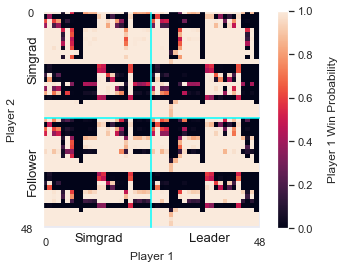

In [212]:
# Input Tournament Data File
pklfile = 'gridhunterOut'
player1 = ['Simgrad', 'Leader']
player2 = ['Simgrad', 'Follower']

cost_matrix(pklfile, player1, player2)

In [204]:
# Input Tournament Data File
pklfile = "gridRand1"
player1 = ['Random', 'Random']
player2 = ['Simgrad', 'Follower']

cost_matrix(pklfile, player1, player2)

0


KeyError: 0

mean Simgrad vs Random: 68.06%
mean Simgrad vs Random: 85.50999999999999%
mean Leader vs Random: 67.62%
mean Leader vs Random: 85.2%


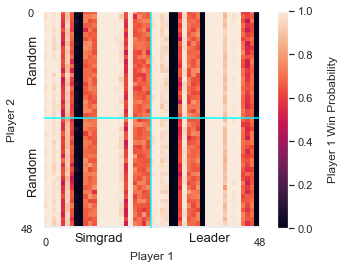

In [174]:
pklfile = "gridRand2"
player1 = ['Simgrad', 'Leader']
player2 = ['Random', 'Random']

cost_matrix(pklfile, player1, player2)

mean Random vs Random: 49.63%
mean Random vs Random: 49.830000000000005%
mean Random vs Random: 50.4%
mean Random vs Random: 50.339999999999996%


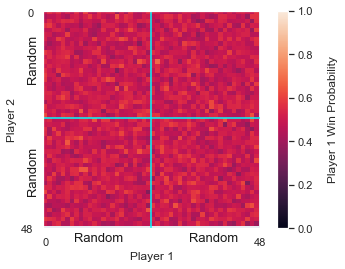

In [173]:
pklfile = "gridRandRand"
player1 = ['Random', 'Random']
player2 = ['Random', 'Random']

cost_matrix(pklfile, player1, player2)

## Soccer Cost Matrices

In [73]:
pklfile = "soccerOut"
player1 = ['Simgrad', 'Leader']
player2 = ['Simgrad', 'Follower']

cost_matrix(pklfile, player1, player2)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/drago/OneDrive - UW/Ratliff Research/tournaments/soccer.pkl'

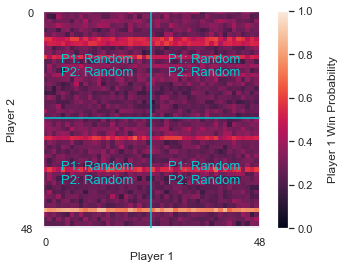

In [76]:
pklfile = "soccerRand1"
player1 = ['Random', 'Random']
player2 = ['Simgrad', 'Follower']

cost_matrix(pklfile, player1, player2)

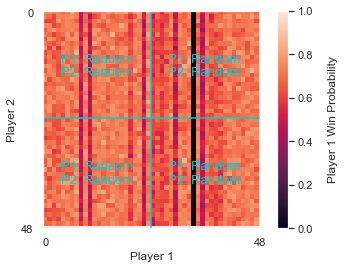

In [74]:
pklfile = "soccerRand2"
player1 = ['Simgrad', 'Leader']
player2 = ['Random', 'Random']

cost_matrix(pklfile, player1, player2)

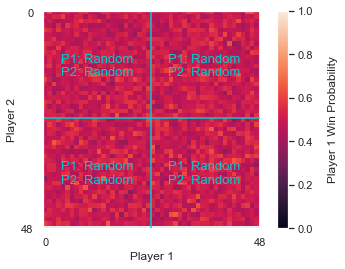

In [75]:
pklfile = "soccerRandRand"
player1 = ['Random', 'Random']
player2 = ['Random', 'Random']

cost_matrix(pklfile, player1, player2)

In [77]:
def cost_matrix(file_name, player1, player2):
    with open(file_name,'rb') as f:
        out = pickle.load(f)

    players = dict()

    for o in out:
        for p in o.keys():
            if p not in players:
                players[p] = len(players)

    n = len(players)
    game_matrix = np.zeros((n,n))

    for o in out:
        for p1 in o.keys():
            for p2 in o[p1].keys():
                idx1 = players[p1]
                idx2 = players[p2]

                rews = np.array(o[p1][p2])
                win_prob = (rews[:,0]>0).mean()
                game_matrix[idx1][idx2] = win_prob
                
    plt.grid(False)
    plt.imshow(game_matrix.transpose(), vmin=0, vmax=1)
    plt.xlabel('Player 1')
    plt.ylabel('Player 2')
    colour = 'darkturquoise'
    plt.xticks([0,48])
    plt.yticks([0,48])

    plt.axvline(x=23.5, color=colour)
    plt.axhline(y=23.5, color=colour)
    textloc = [3.5, 11, 27.5, 35]
    text_spacing = 3
    textsize = 13
    plt.text(textloc[0], textloc[1], player1[0], color=colour).set_size(textsize)
    plt.text(textloc[2], textloc[1], player1[1], color=colour).set_size(textsize)
    plt.text(textloc[0], textloc[3], player2[0], color=colour).set_size(textsize)
    plt.text(textloc[2], textloc[3], player2[1], color=colour).set_size(textsize)
    cbr = plt.colorbar()
    cbr.set_label('Player 1 Win Probability',  labelpad=15)